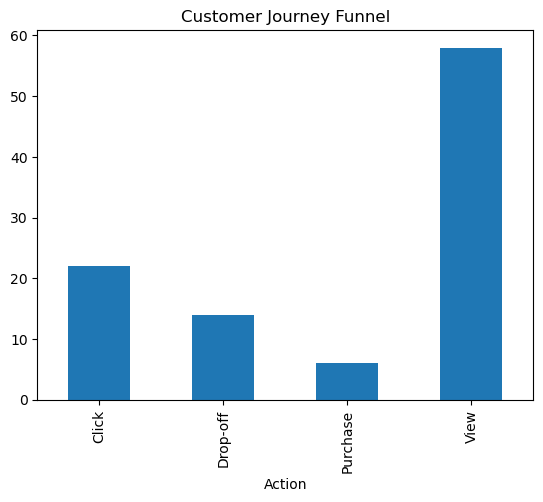

In [35]:
# 6.Business Recommendations (SQL & Python):

import pandas as pd
import mysql.connector as db
from datetime import datetime
import matplotlib.pyplot as plt

csv_file_path1 = r'D:\Customer_Analysis\customer_journey.csv'
data1 = pd.read_csv(csv_file_path1,dayfirst=True)

funnel = data1.groupby('Action').size()
funnel.plot(kind='bar', title='Customer Journey Funnel')
plt.show()


In [38]:
data1['Stage'] = data1.groupby('ProductID').cumcount()
funnel = data1.groupby('Stage').size()
conversion_rate = funnel / funnel.shift(1)
print(conversion_rate)

Stage
0         NaN
1    0.950000
2    0.947368
3    0.833333
4    0.866667
5    0.538462
6    0.571429
7    0.500000
8    1.000000
dtype: float64


In [40]:
from textblob import TextBlob
import pandas as pd

csv_file_path1 = r'D:\Customer_Analysis\customer_reviews.csv'
data1 = pd.read_csv(csv_file_path1,dayfirst=True)

def get_sentiment(review):
    sentiment = TextBlob(review).sentiment.polarity
    return "Positive" if sentiment > 0 else "Negative" if sentiment < 0 else "Neutral"

data1['sentiment'] = data1['ReviewText'].apply(get_sentiment)
print(data1.head())

   ReviewID  CustomerID  ProductID  ReviewDate  Rating  \
0         1          77         18  12/23/2023       3   
1         2          80         19  12/25/2024       5   
2         3          50         13   1/26/2025       4   
3         4          78         15   4/21/2025       3   
4         5          64          2   7/16/2023       3   

                                 ReviewText sentiment  
0   Average  experience,  nothing  special.  Positive  
1            The  quality  is    top-notch.  Positive  
2   Five  stars  for  the  quick  delivery.  Positive  
3  Good  quality,  but  could  be  cheaper.  Positive  
4   Average  experience,  nothing  special.  Positive  


In [1]:
import pandas as pd
import mysql.connector as db
from datetime import datetime

user  = 'root'
passcode = "password12*"
host = 'localhost'
db_name = "shopeasy"

db_connection1 = db.connect(
                host  = host,
                user = user,
                password = passcode,
                database = db_name
)

db_connection1
curr = db_connection1.cursor()

sql = """
                SELECT 
                    pro.ProductID, 
                    pro.ProductName, 
                    SUM(pro.Price) AS TotalPrice,
                    encage.ContentType,
                    SUM(encage.Likes) AS TotalLikes, 
                    encage.EngagementDate, 
                    encage.ViewsClicksCombined
                FROM 
                    shopeasy.products AS pro
                LEFT OUTER JOIN 
                    shopeasy.engagement_data AS encage 
                ON 
                    pro.ProductID = encage.ProductID
                GROUP BY 
                    pro.ProductID, 
                    pro.ProductName, 
                    encage.ContentType, 
                    encage.EngagementDate, 
                    encage.ViewsClicksCombined
                LIMIT 
                    0, 1000;
        """

curr.execute(sql)
results1 = curr.fetchall()

df = pd.read_sql_query(sql, db_connection1)
print(df.head())

   ProductID    ProductName  TotalPrice ContentType  TotalLikes  \
0          1  Running Shoes      223.75        BLOG       657.0   
1          1  Running Shoes      223.75       video         0.0   
2          1  Running Shoes      223.75        Blog        11.0   
3          1  Running Shoes      223.75  Newsletter        92.0   
4          1  Running Shoes      223.75       Video       400.0   

  EngagementDate ViewsClicksCombined  
0     2023-01-06           6991-2499  
1     2025-07-17               219-7  
2     2024-09-29            2549-228  
3     2023-08-12            3640-370  
4     2023-01-24           9759-3095  


C:\Users\I02062\AppData\Local\Temp\ipykernel_47612\645948754.py:48: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, db_connection1)


In [2]:
from textblob import TextBlob
import pandas as pd


df = pd.read_csv('D:\Customer_Analysis\customer_reviews.csv')

# Function to get sentiment polarity
def analyze_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    return "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"

# Apply sentiment analysis
df['Sentiment'] = df['ReviewText'].apply(analyze_sentiment)
sentiment_summary = df['Sentiment'].value_counts()
print(sentiment_summary)



<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
C:\Users\I02062\AppData\Local\Temp\ipykernel_772400\3762434751.py:5: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('D:\Customer_Analysis\customer_reviews.csv')


Sentiment
Positive    84
Negative    11
Neutral      5
Name: count, dtype: int64


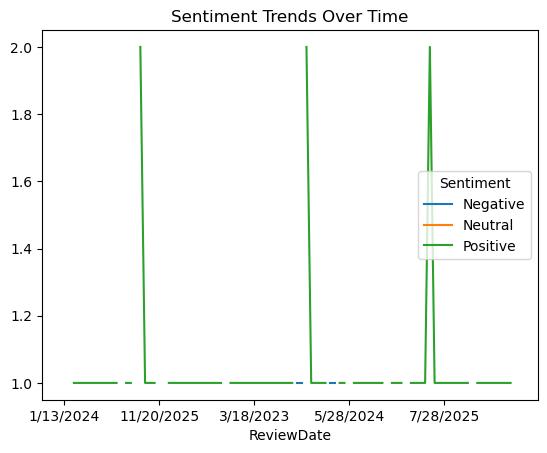

In [3]:
import matplotlib.pyplot as plt

# Plot sentiment trends
sentiment_trends = df.groupby('ReviewDate')['Sentiment'].value_counts().unstack()
sentiment_trends.plot(kind='line', title='Sentiment Trends Over Time')
plt.show()